<span style="color:#e5065c; font-size:28px; font-weight:700"> Linear Discriminant Analysis (LDA)</span>

Linear Discriminant Analysis or LDA is a technique to classify an object into one of two or more groups 
depending on a set of features that describes that object. 
It does so by assigning the object to the group with the highest conditional probability. 

LDA is an extension to logistic regression. In this alternative approach, we model the distribution of the predictors X separately in each of the response classes (i.e. given Y ), and then use Bayes’ theorem to flip these around into estimates for $P(Y = k|X = x)$. When these distributions are assumed to be normal, it turns out that the model is very similar in form to logistic regression.


** Why do we need another method, when we have logistic regression?**
There are several reasons:
* When the classes are well-separated, the parameter estimates for the logistic regression model are surprisingly unstable. Linear discriminant analysis does not suffer from this problem.
* If n is small and the distribution of the predictors X is approximately normal in each of the classes, the linear discriminant model is again more stable than the logistic regression model.
* Linear discriminant analysis is popular when we have more than two response classes.

<span style="color:#0cd331; font-size:20px; font-weight:700"> Using Bayes’ Theorem for Classification</span>

Suppose that we wish to classify an observation into one of _K_ classes, where K ≥ 2.
The response variable Y can take on K possible distinct and unordered values. 
Let $π_k$ represent the prior probability that a randomly chosen observation comes from the kth class. 
This is the probability that a given observation is associated with the $k_{th}$ category of the response variable Y. 
Let $f_k (X) ≡ P (X = x|Y = k)$ denote the density function of $X$ for an observation that comes from the $k_{th}$ class. 
In other words, $f_k (x)$ is relatively large if there is a high probability that an observation in the $k_{th}$ class has X ≈ x, 
and $f_k (x)$ is small if it is very unlikely that an observation in the kth class has $X ≈ x$. 
Then Bayes’ theorem states that...

$$ P(Y = k\ |\ X = x) = \frac{π_k f_k(x)}{\sum_{l=1}^{K} π_l f_l(x)} \quad\quad\quad\quad - \quad (1)$$


If the above equation is represented using the notation used for logistic regression we will get something like $p_k (X) = P (Y = k\ |\ X)$.
This means instead of directly computing $p_k (X)$, we can simply plug in estimates of $π_k$ and $f_k (X)$ into the complicated looking equation above. 
Estimating $π_k$ is easy if we have a random sample of $Ys$ from the population. 
We compute the fraction of the training observations that belong to the kth class. 

Estimating $f_k (X)$ is a bit more challenging, 
$p_k (x)$ is the posterior probability that an observation $X\ =\ x$ belongs to the $k_{th}$ class. 
That is, it is the probability that the observation belongs to the $k_{th}$ class, 
given the predictor value for that observation. 
The Bayes classifier, which classifies an observation to the class for which $p_k (X)$ is largest, 
has the lowest possible error rate out of all classifiers. 
Therefore, if we can find a way to estimate $f_k (X)$, then we can develop a classifier that approximates the Bayes classifier.


#### Linear Discriminant Analysis for p=1 (one predictor)

Assume that p = 1, that is, we have only one predictor. 
We would like to obtain an estimate for $f_k (x)$ that we can plug into the equation above in order to estimate $p_k (x)$. 
We will then classify an observation to the class for which $p_k (x)$ is greatest. 
In order to estimate $f_k (x)$, we will first make some assumptions about its form.

Suppose we assume that $f_k (x)$ is normal or Gaussian. 
In the one-dimensional setting, the normal density takes the form…

$$f_k(x) = \frac{1}{\sqrt{2\pi}\sigma_k} exp\bigg(-\frac{1}{2{\sigma_k}^2}(x-\mu_k)^2\bigg) \quad\quad\quad\quad - \quad (2)$$

where $\mu_k$ and ${\sigma_k}^2$ are the mean and variance parameters for the kth class. 
For now, let us further assume that ${\sigma_1}^2 = {\sigma_2}^2 ... = {\sigma_k}^2$:  
that is, there is a shared variance term across all K classes, which for simplicity we can denote by $\sigma^2$.

Plugging (2) in (1), we find that

$$p_k(x) = \frac{π_k \frac{1}{\sqrt{2\pi}\sigma} exp\bigg(-\frac{1}{2{\sigma}^2}(x-\mu_k)^2\bigg)}
{\sum_{l=1}^{K} π_l \frac{1}{\sqrt{2\pi}\sigma} exp\bigg(-\frac{1}{2{\sigma}^2}(x-\mu_l)^2\bigg)} \quad\quad\quad\quad - \quad (3)$$

The Bayes classifier involves assigning an observation X = x to the class for which (3) is largest. 
Taking the log of (3) and rearranging the terms, 
it is not hard to show that this is equivalent to assigning the observation to the class for which

$$\delta_k(x) = x. \frac{\mu_k}{\sigma^2} - \frac{{\mu_k}^2}{2\sigma^2}+log(\pi_k)$$

is largest. For instance, if K = 2 and $\pi_1$ = $\pi_2$, 
then the Bayes classifier assigns an observation to class 1 if $2x(\mu_1 − \mu_2) > {\mu_1}^2 − {\mu_2}^2$, 
and to class 2 otherwise.

In this case, the **Bayes decision boundary** corresponds to the point where

$$x = \frac{{\mu_1}^2 − {\mu_2}^2}{2(\mu_1-\mu_2)} = \frac{\mu_1+\mu_2}{2} \quad\quad\quad\quad - \quad (4)$$

Consider the following image. <img src="../images/bayes.PNG">

The dashed vertical line represents the Bayes decision boundary. 
The two normal density functions that are displayed, $f_1(x)$ and $f_2(x)$, represent two distinct classes. 
The mean and variance parameters for the two density functions are $\mu_1$ = −1.25, $\mu_2$ = 1.25, 
and $\sigma_1$ = $\sigma_2$ = 1. 
The two densities overlap, and so given that $X = x$, there is some uncertainty about the class to which the observation belongs. 
If we assume that an observation is equally likely to come from either class that is, $\pi_1 = \pi_2$ = 0.5: 
then by inspection of (4), we see that the Bayes classifier assigns the observation to class 1 if x < 0 and class 2 otherwise. 
Note that in this case, we can compute the Bayes classifier because we know that X is drawn from a Gaussian distribution within each class,
and we know all of the parameters involved. 
In a real-life situation, we are not able to calculate the Bayes classifier.

#### Linear Discriminant Analysis for p >1 (more than one predictor)

We now extend the LDA classifier to the case of multiple predictors.
To do this, we will _assume_ that X = (X1, X2, . . .Xp) is drawn from a multivariate Gaussian 
(or multivariate normal) distribution, 
with a class-specific mean vector and a common covariance matrix. 

To indicate that a p-dimensional random variable X has a multivariate Gaussian distribution, 
we write $X \sim N (\mu,\sum)$. 
Here $E (X) = \mu$ is the mean of X (a vector with p components), 
and $Cov (X) = \sum$ is the $p × p$ covariance matrix of X. 
Formally, the multivariate Gaussian density is defined as below...

$$f_k(x) = \frac{1}{(2\pi)^{p/2}|\sum|^{1/2}} exp\bigg(-\frac{1}{2}(x-\mu)^T\sum^{-1}(x-\mu)\bigg) \quad\quad\quad\quad - \quad (5)$$


In the case of p > 1 predictors, 
the LDA classifier assumes that the observations in the $k_th$ class are drawn from a multivariate Gaussian distribution $N (μ_k, Σ)$, 
where $μ_k$ is a class-specific mean vector, 
and Σ is a covariance matrix that is common to all K classes. 
Plugging the density function for the $k_th$ class, $f_k (X = x)$, 
into (1) and performing a little bit of algebra reveals that the Bayes classifier
assigns an observation X = x to the class for which 

$$\delta_k(x) = x^T \Sigma^{-1} \mu_k - \frac{1}{2} {\mu_k}^T \Sigma^{-1} \mu_k + log \pi_k$$

is largest. Consider the image below.

<img src="../images/lda_multi_predictors.PNG">

Three equally sized Gaussian classes are shown with class-specific mean vectors and a common covariance matrix. 
The three ellipses represent regions that contain 95% of the probability for each of the three classes. 
The dashed lines are the Bayes decision boundaries. 
Note that there are three lines representing the Bayes decision boundaries 
because there are three pairs of classes among the three classes.
That is, one Bayes decision boundary separates class 1 from class 2, 
one separates class 1 from class 3, and one separates class 2 from class 3. 
These three Bayes decision boundaries divide the predictor space into three regions.
The Bayes classifier will classify an observation according to the region in which it is located.

Once again, we need to estimate the unknown parameters $\mu_1, . . . , \mu_K$, $\pi_1, . . . , \pi_K$, 
and $\Sigma$, the formulas are similar to those used in the one-dimensional case. 
To assign a new observation X = x,
LDA plugs these estimates into (5) and classifies to the class for which $\hat\delta_k (x)$ is largest.



----
We will evaluate the performance of LDA over logistic regression. 
We are going to use the `Smarket` dataset to predict `Direction`. 
Fit an LDA model using the `lda()` function, 
which is part of the MASS library. 
Notice that the `lda()` syntax for the `lda()` function is identical to that of `lm()` and to that of `glm()`, 
except for the absence of the family option. 

We are going to train the model on those observations that occurred before the year 2005, 
and predict direction for observations in 2005.


**Note:** If you decide you want to rerun the cell below, you should first Save the notebook.  
Then **restart the kernel** from the notebook menu: `Kernel > Restart and Clear Output`.

In [2]:
install.packages('ISLR')
library(ISLR)
attach(Smarket)

# The object train is a vector of 1,250 elements, corresponding  
# to the observations in our data set. The elements of the 
# vector that correspond to observations that occurred before 2005 
#are set to TRUE as they satisfy the condition, whereas those that 
# correspond to observations in 2005 are set to FALSE. 
train = Year < 2005

# train is a Boolean vector, since its elements are TRUE and FALSE. 
# So, the TRUE and FALSE values corresponding to each row
# will let you subset rows or columns of a matrix. For instance, 
# the command Smarket[!train,] would pick out a submatrix of the
# stock market dataset, corresponding to dates in 2005, since those 
# are the ones for which the elements of train are FALSE and 
# `!` operator will reverse the elements of train vector.
Smarket.2005= Smarket[!train,]

# Check the dimensions of Smarket.2005
dim(Smarket.2005)

# Save the Direction values corresponding to 2005 dates.
Direction.2005 = Direction[!train]

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


[1] 252   9

In [3]:
head(Smarket)

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up


In [4]:
library(MASS)
lda.fit=lda(Direction~Lag1+Lag2 ,data=Smarket ,subset=train)
lda.fit

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

Please run the cell below and read about the `lda()` function.

In [5]:
help(lda)

The model output indicates that $\hat{π}_1$ = 0.492 and $\hat{π}_2$ = 0.508. 
In other words,  49.2% of the training observations correspond to days during which the market went down. 
The group means are the average of each predictor within each class, 
and are used by LDA as estimates of $μ_k$. 
These suggest that there is a tendency for previous 2 days’ returns to be negative on days when the market 
increases and a tendency for the previous 2 days’ returns to be positive on days when the market declines. 

The coefficients of linear discriminants output provides the linear combination of Lag1 and Lag2 that are used to form the LDA decision rule. 
In essence, these coefficients map the data onto a line to form the decision space.
If (`−0.642×Lag1−0.514×Lag2`) is large, then the LDA classifier will predict a market increase, 
and if it is small, then the LDA classifier will predict a market decline. 

Below, the first plot is for observations where market went down and second plot observations show market went up.  

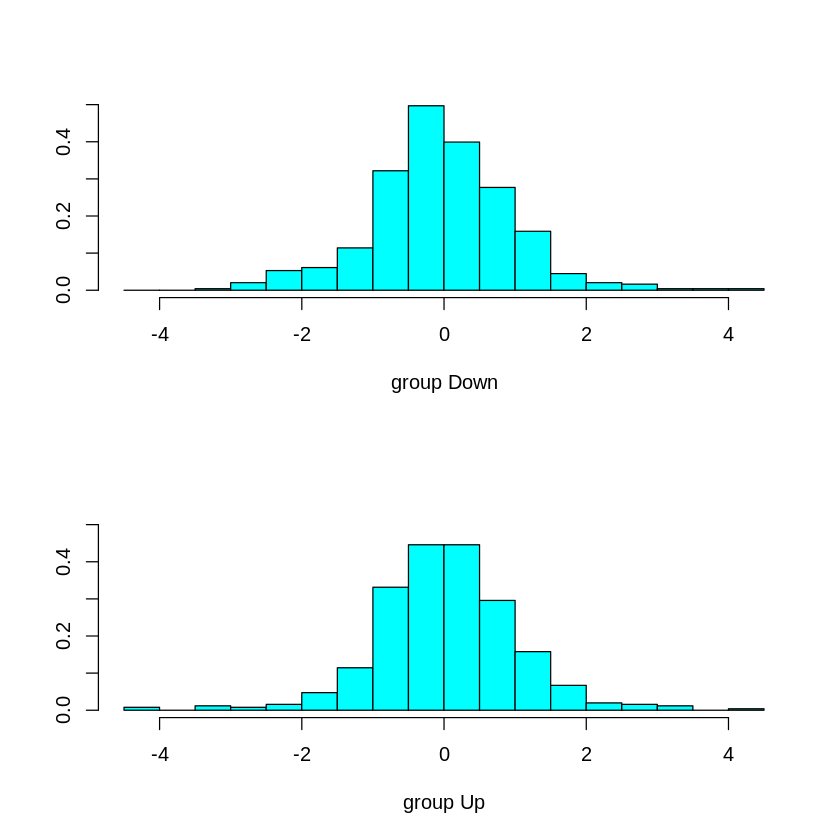

In [6]:
plot(lda.fit)

The `plot()` function produces plots of the linear discriminants, 
obtained by computing (`−0.642 × Lag1 − 0.514 × Lag2`) for each of the training observations. 
The horizontal axis is the linear combination of Lag1 and Lag2. 
Both the groups are centered on 0, and have similar spread, which means there is nothing that distinguishes these two groups. 
The prediction error will be close to 50%, 
which indicates that you cannot distinguish between the groups. 
The range of x-axis (-4 to 4) represents the range of Lag1 and Lag2. 



The `predict()` function returns a list with three elements. 
The first element, class, contains LDA’s predictions about the movement of the market. 
The second element, posterior, is a matrix whose kth column contains the posterior probability that the corresponding observation belongs to the kth class. 
Finally, x contains the linear discriminants.

In [7]:
lda.pred=predict(lda.fit, Smarket.2005)
names(lda.pred)

[1] "class"     "posterior" "x"

In [8]:
lda.class =lda.pred$class
table(lda.class ,Direction.2005)

mean(lda.class == Direction.2005)

         Direction.2005
lda.class Down  Up
     Down   35  35
     Up     76 106

[1] 0.5595238

Applying a 50% threshold to the posterior probabilities allows us to recreate the predictions contained in `lda.pred$class`

In [9]:
sum(lda.pred$posterior[ ,1]>=0.5)

sum(lda.pred$posterior[,1]<0.5)

[1] 70

[1] 182

In [10]:
data.frame(lda.pred)[1:20,]

,class,posterior.Down,posterior.Up,LD1
,<fct>,<dbl>,<dbl>,<dbl>
999,Up,0.4901792,0.5098208,0.08293096
1000,Up,0.4792185,0.5207815,0.59114102
1001,Up,0.4668185,0.5331815,1.16723063
1002,Up,0.4740011,0.5259989,0.83335022
1003,Up,0.4927877,0.5072123,-0.03792892
1004,Up,0.4938562,0.5061438,-0.08743142
1005,Up,0.4951016,0.5048984,-0.14512719
1006,Up,0.4872861,0.5127139,0.21701324
1007,Up,0.4907013,0.5092987,0.05873792


The posterior probability played an important role in predicting market direction. 
If the posterior prob is > 0.5 for up, it resulted in predicting up and if the posterior probability for down is > 0.5, the model predicted down. 
The 0.5 is the threshold. 
It also appears that the LD1 is used to calculate the posterior probs.

If we wanted to use a posterior probability threshold other than 50% in order to make predictions, 
then we could easily do so. 
For instance, suppose that we wish to predict a market decrease only if we are very certain that the market 
will indeed decrease on that day — i.e., if the posterior probability is at least 90%.

In [11]:
sum(lda.pred$posterior[,1]>.9)

[1] 0

No days in 2005 meet that threshold! In fact, the greatest posterior probability of decrease in all of 2005 was 52.02%.

# Save your notebook!